## Determinantes del rendimiento académico de la educación media de Colombia año 2020

En este proyecto realizaremos un analisis exploratorio de los datos y posteriormente una regresión logit y probit ordenada de los resultados de las pruebas SABER 11 del año 2020 para conocer cuales son las variables que determinan el rendimiento academico de los estudiantes. Para realizar este analisis se tomara como variable dependiente los resultados en la prueba de los estudiando, donde se clasificara en 4 niveles insuficiente, mínimo, satisfactorio y avanzando escalafón dado por el ICFES. Con respecto a las variables independientes tenemos género, naturaleza del colegio, área de ubicación del colegio, educación del padre y la madre, estrato socioeconómico, horas de trabajo, acceso a internet y un a computador.

Para mayor información de la teoría en el uso de las variables comparto mi artículo "Determinantes del rendimiento académico de la educación media en el Departamentode Nariño,Colombia" publicado por la revista Lecturas de economía de la universidad de Antioquia.

Link del artículo: https://revistas.udea.edu.co/index.php/lecturasdeeconomia/article/view/341834/20804553

Fuente: ICFES



### 1. Cargamos las librerias


In [1]:
import pandas as pd # Libreria para el tratamiento de DataFrames
import matplotlib.pyplot as plt # Libreria gráfica
import seaborn as sns # Libreria Gráfica
import numpy as np # Libreria de algebra lineal


### 2. Cargamos la base de datos

In [31]:
# Lectura del dataset
saber_11 = pd.read_csv("/work/datos_saber_11_2020.csv", encoding='latin-1')
saber_11.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,03/07/2003,20204,SB11202040001656,ESTUDIANTE,COLOMBIA,No,CALDAS,...,48.0,61,A1,261,61.0,61.340840,3.0,3.0,PUBLICAR,NO
1,TI,COLOMBIA,F,16/06/2003,20204,SB11202040001763,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,58.0,85,A2,306,87.0,71.825844,4.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,F,11/09/2003,20204,SB11202040001490,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,51.0,71,A1,321,92.0,57.286312,3.0,3.0,PUBLICAR,NO
3,TI,COLOMBIA,M,05/03/2004,20204,SB11202040096445,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,...,67.0,94,A2,338,96.0,67.476602,4.0,4.0,PUBLICAR,NO
4,TI,COLOMBIA,M,30/08/2003,20204,SB11202040048154,ESTUDIANTE,COLOMBIA,No,TOLIMA,...,29.0,1,A-,225,35.0,43.877158,2.0,2.0,PUBLICAR,GENERACION E - GRATUIDAD


### 3. Exploración de los datos

In [32]:
# ¿Que columnas tienen los datos?
saber_11.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',


In [33]:
# ¿Que tamaño tienen los datos?
saber_11.shape

(520307, 81)

In [34]:
# ¿Hay nulos en los datos?
saber_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520307 entries, 0 to 520306
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_TIPODOCUMENTO             520307 non-null  object 
 1   ESTU_NACIONALIDAD              520307 non-null  object 
 2   ESTU_GENERO                    520298 non-null  object 
 3   ESTU_FECHANACIMIENTO           520307 non-null  object 
 4   PERIODO                        520307 non-null  int64  
 5   ESTU_CONSECUTIVO               520307 non-null  object 
 6   ESTU_ESTUDIANTE                520307 non-null  object 
 7   ESTU_PAIS_RESIDE               520307 non-null  object 
 8   ESTU_TIENEETNIA                516550 non-null  object 
 9   ESTU_DEPTO_RESIDE              519541 non-null  object 
 10  ESTU_COD_RESIDE_DEPTO          519541 non-null  float64
 11  ESTU_MCPIO_RESIDE              519541 non-null  object 
 12  ESTU_COD_RESIDE_MCPIO         

In [35]:
# Como se distribuyen las variables numéricas 
saber_11.describe()

,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,...,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
count,520307.000000,519541.000000,519541.000000,520307.000000,5.203070e+05,5.203070e+05,520307.000000,520307.000000,520099.000000,520099.000000,...,520307.000000,520307.000000,520307.000000,519937.000000,520307.000000,520307.000000,520271.000000,505671.000000,505671.000000,520253.000000
mean,20203.911004,36.332692,32913.910806,286320.003773,2.057852e+11,2.061815e+11,32910.716129,32.675432,32917.954686,32.700511,...,48.441270,50.239732,2.034797,47.418543,50.132697,249.565962,50.102912,51.177925,2.434102,2.457089
std,0.508986,605.105817,26569.979371,288053.443660,9.341946e+10,9.393000e+10,26544.054765,26.521581,26619.865233,26.595928,...,12.086911,28.889732,0.833176,11.959334,28.935389,49.568905,28.903357,9.721230,0.858744,0.681954
min,20201.000000,5.000000,5001.000000,83.000000,1.050010e+11,1.050010e+11,5001.000000,5.000000,5001.000000,5.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,14.281577,1.000000,1.000000
25%,20204.000000,11.000000,11001.000000,59006.000000,1.171740e+11,1.172720e+11,11001.000000,11.000000,11001.000000,11.000000,...,39.000000,25.000000,1.000000,39.000000,25.000000,212.000000,25.000000,44.490353,2.000000,2.000000
50%,20204.000000,20.000000,20621.000000,139212.000000,1.738540e+11,1.760010e+11,20770.000000,20.000000,20400.000000,20.000000,...,48.000000,50.000000,2.000000,45.000000,50.000000,246.000000,50.000000,50.886929,2.000000,2.000000
75%,20204.000000,54.000000,54001.000000,666917.000000,3.052660e+11,3.052660e+11,54001.000000,54.000000,54001.000000,54.000000,...,57.000000,75.000000,3.000000,53.000000,75.000000,283.000000,75.000000,57.251482,3.000000,3.000000
max,20204.000000,99999.000000,99999.000000,752444.000000,8.548740e+11,8.548740e+11,99773.000000,99.000000,99773.000000,99.000000,...,100.000000,100.000000,4.000000,100.000000,100.000000,500.000000,100.000000,84.836366,4.000000,4.000000


In [36]:
# Como se comportan las variables categoricas 
saber_11.describe(include=["O"])

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,...,COLE_AREA_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,DESEMP_INGLES,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
count,520307,520307,520298,520307,520307,520307,520307,516550,519541,519541,...,520307,520307,520307,520307,520307,520099,520099,520307,520307,520307
unique,12,48,2,11026,520307,1,48,2,34,1031,...,2,6,1028,33,2,485,33,5,2,4
top,TI,COLOMBIA,F,23/09/2003,SB11202040224157,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,BOGOTÁ D.C.,...,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,N,BOGOTÁ D.C.,BOGOTÁ,A-,PUBLICAR,NO
freq,426040,517029,284160,951,1,520307,517029,484456,80859,80859,...,435481,205624,80406,80406,520153,81530,81530,305111,520047,269219


### 3.1 Procesamiento de datos
Para realizar este procedimiento nos basaremos en el marco teórico presentado en al articulo "Determinantes del rendimiento académico de la educación media en el Departamentode Nariño,Colombia"

Las variables con las que vamos a trabajar seran:

•Género

•Estrato socioeconómico

•Naturaleza del colegio

•Área de ubicación del colegio

•Educación del padre

•Educación de la madre

•Horas de trabajo

•Acesso a internet

•Acesso a computador

•Puntaje global

In [37]:
# Procedemos a seleccionar nuestras columnas de interes
saber_11 = saber_11[["ESTU_GENERO", "FAMI_ESTRATOVIVIENDA", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE",
                     "FAMI_TIENECOMPUTADOR", "FAMI_TIENEINTERNET", "ESTU_HORASSEMANATRABAJA", 
                      "COLE_NATURALEZA", "COLE_AREA_UBICACION", "PUNT_GLOBAL"]]

In [38]:
# Observamos las primeras 5 filas
saber_11.head()

,ESTU_GENERO,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,ESTU_HORASSEMANATRABAJA,COLE_NATURALEZA,COLE_AREA_UBICACION,PUNT_GLOBAL
0,M,Estrato 5,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,0,NO OFICIAL,URBANO,261
1,F,Estrato 3,Postgrado,Educación profesional completa,Si,Si,Entre 11 y 20 horas,NO OFICIAL,URBANO,306
2,F,Estrato 1,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,Si,0,OFICIAL,URBANO,321
3,M,Estrato 3,Postgrado,Educación profesional completa,Si,Si,0,NO OFICIAL,URBANO,338
4,M,Estrato 1,Primaria completa,Secundaria (Bachillerato) incompleta,No,Si,Entre 11 y 20 horas,OFICIAL,URBANO,225


In [39]:
# Creación de las categorias del ICFES para la variable puntaje global
bins = [-1,175, 250, 350,500]
category = ["Insuficiente", "Mínimo", "Satisfactorio", "Avanzado"]
saber_11["PUNT_GLOBAL"] = pd.cut(saber_11["PUNT_GLOBAL"], bins, labels=category)

### 3.2 Estudio de la variable puntaje global
A continuación realizaremos el analisis del puntaje gobal en relación con las demás variables del presente proyecto.

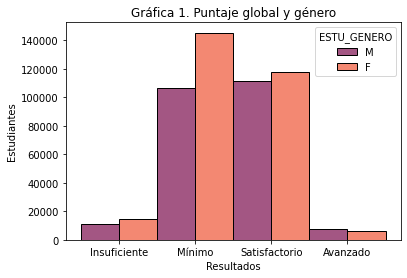

In [40]:
# Resultados y género
sns.histplot(data = saber_11, 
            x = "PUNT_GLOBAL", 
            hue = "ESTU_GENERO", 
            palette="rocket", 
            multiple = "dodge")
plt.title("Gráfica 1. Puntaje global y género")
plt.ylabel("Estudiantes")
plt.xlabel("Resultados")
plt.show()

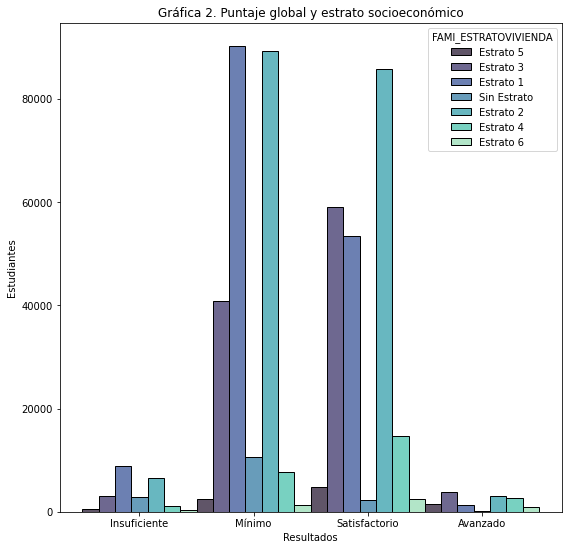

In [41]:
# Resultados y estrato socioeconómico
plt.figure(figsize=(9,9))
sns.histplot(data = saber_11, 
            x = "PUNT_GLOBAL", 
            hue = "FAMI_ESTRATOVIVIENDA", 
            palette="mako", multiple = "dodge")
plt.title("Gráfica 2. Puntaje global y estrato socioeconómico")
plt.ylabel("Estudiantes")
plt.xlabel("Resultados")
plt.show()

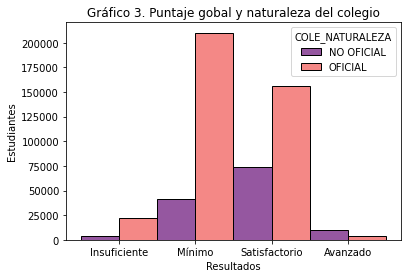

In [42]:
# Resultados y naturaleza del colegio
sns.histplot(data = saber_11, 
            x = "PUNT_GLOBAL", 
            hue = "COLE_NATURALEZA", 
            palette="magma", multiple = "dodge")
plt.title("Gráfico 3. Puntaje gobal y naturaleza del colegio")
plt.ylabel("Estudiantes")
plt.xlabel("Resultados")
plt.show()

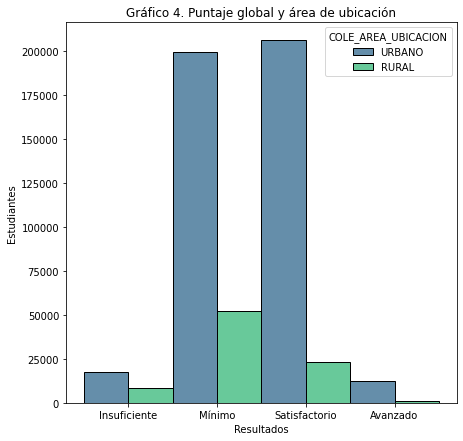

In [43]:
# Resultados y área de ubicación
plt.figure(figsize=(7,7))
sns.histplot(data = saber_11, 
            x = "PUNT_GLOBAL", 
            hue = "COLE_AREA_UBICACION", 
            palette="viridis", multiple = "dodge")
plt.title("Gráfico 4. Puntaje global y área de ubicación")
plt.ylabel("Estudiantes")
plt.xlabel("Resultados")
plt.show()

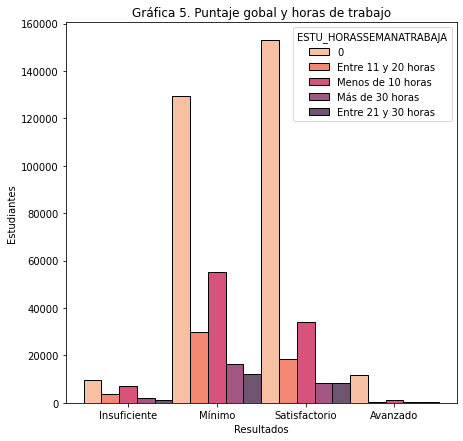

In [44]:
# Resultados y naturaleza del colegio
plt.figure(figsize=(7,7))
sns.histplot(data = saber_11, 
            x = "PUNT_GLOBAL", 
            hue = "ESTU_HORASSEMANATRABAJA", 
            palette="rocket_r", multiple = "dodge")
plt.title("Gráfica 5. Puntaje gobal y horas de trabajo")
plt.ylabel("Estudiantes")
plt.xlabel("Resultados")
plt.show()

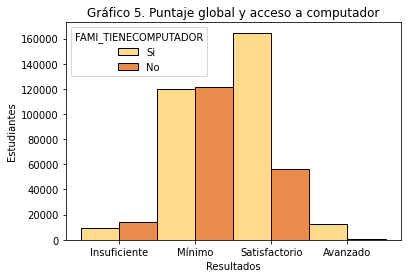

In [45]:
# Resultados y acceso a computador
sns.histplot(data = saber_11, 
            x = "PUNT_GLOBAL", 
            hue = "FAMI_TIENECOMPUTADOR", 
            palette="YlOrBr", multiple = "dodge")
plt.title("Gráfico 5. Puntaje global y acceso a computador")
plt.ylabel("Estudiantes")
plt.xlabel("Resultados")
plt.show()

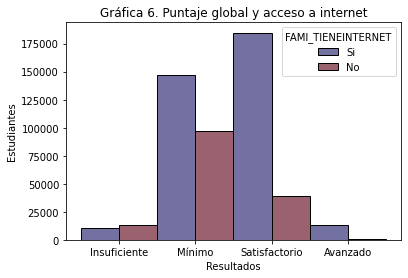

In [46]:
# Resultados y acceso a internet
sns.histplot(data = saber_11, 
            x = "PUNT_GLOBAL", 
            hue = "FAMI_TIENEINTERNET", 
            palette="icefire", multiple = "dodge")
plt.title("Gráfica 6. Puntaje global y acceso a internet")
plt.ylabel("Estudiantes")
plt.xlabel("Resultados")
plt.show()

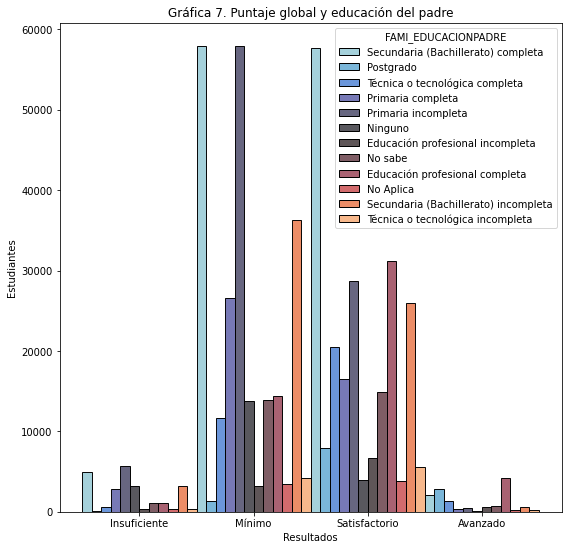

In [47]:
# Resultados y educación del padre
plt.figure(figsize=(9,9))
sns.histplot(data = saber_11, 
            x = "PUNT_GLOBAL", 
            hue = "FAMI_EDUCACIONPADRE", 
            palette="icefire", multiple = "dodge")
plt.title("Gráfica 7. Puntaje global y educación del padre")
plt.ylabel("Estudiantes")
plt.xlabel("Resultados")
plt.show()


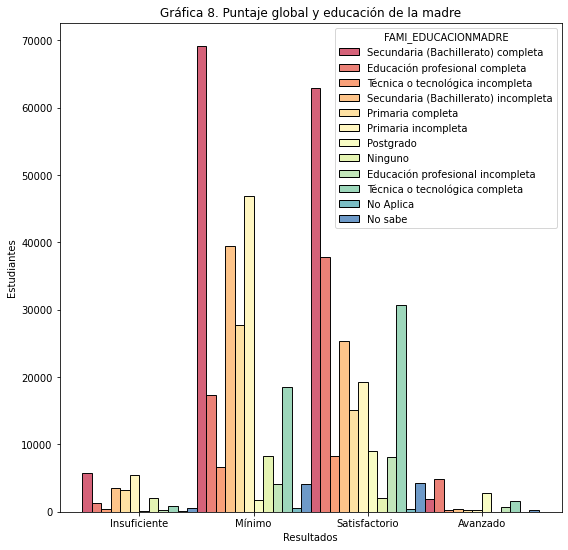

In [48]:
# Resultados y educación de la madre
plt.figure(figsize=(9,9))
sns.histplot(data = saber_11, 
            x = "PUNT_GLOBAL", 
            hue = "FAMI_EDUCACIONMADRE", 
            palette="Spectral", multiple = "dodge")
plt.title("Gráfica 8. Puntaje global y educación de la madre")
plt.ylabel("Estudiantes")
plt.xlabel("Resultados")
plt.show()

### 4. Tratamiento de los datos para modelación
A continuación se realizara la transformación de las variables a numéricas, además de la imputación de los datos en el caso de existir datos nulos.


In [52]:
# Creación de variables dummys 

saber_11["ESTU_GENERO"] = saber_11.ESTU_GENERO.map({"F":0, "M":1})

saber_11["FAMI_ESTRATOVIVIENDA"] = saber_11.FAMI_ESTRATOVIVIENDA.map({"Sin Estrato":0,
                                                                "Estrato 1":1,
                                                                "Estrato 2":2,
                                                                "Estrato 3":3,
                                                                "Estrato 4":4,
                                                                "Estrato 5":5,
                                                                "Estrato 6":6})

saber_11["FAMI_EDUCACIONPADRE"] = saber_11.FAMI_EDUCACIONPADRE.map({"Ninguna":0,
                                                                      "No Aplica":1,
                                                                      "No sabe":2,
                                                                      "Primaria incompleta":3,
                                                                      "Primaria completa":4,
                                                                      "Secundaria (Bachillerato) incompleta":5,
                                                                      "Secundaria (Bachillerato) completa":6,
                                                                      "Técnica o tecnológica incompleta":7,
                                                                      "Técnica o tecnológica completa":8,
                                                                      "Educación profesional completa":9,
                                                                      "Educación profesional completa":10,
                                                                      "Postgrado":11})

saber_11["FAMI_EDUCACIONMADRE"] = saber_11.FAMI_EDUCACIONMADRE.map({"Ninguna":0,
                                                                      "No Aplica":1,
                                                                      "No sabe":2,
                                                                      "Primaria incompleta":3,
                                                                      "Primaria completa":4,
                                                                      "Secundaria (Bachillerato) incompleta":5,
                                                                      "Secundaria (Bachillerato) completa":6,
                                                                      "Técnica o tecnológica incompleta":7,
                                                                      "Técnica o tecnológica completa":8,
                                                                      "Educación profesional completa":9,
                                                                      "Educación profesional completa":10,
                                                                      "Postgrado":11})

saber_11["FAMI_TIENEINTERNET"] = saber_11.FAMI_TIENEINTERNET.map({"No":0,
                                                              "Si":1})
saber_11["FAMI_TIENECOMPUTADOR"] = saber_11.FAMI_TIENECOMPUTADOR.map({"No":0,
                                                              "Si":1}) 

saber_11["ESTU_HORASSEMANATRABAJA"] = saber_11.ESTU_HORASSEMANATRABAJA.map({"0":0,
                                                                 "Menos de 10 horas":1,
                                                                 "Entre 11 y 20 horas":2,
                                                                 "Entre 21 y 30 horas":3,
                                                                 "Más de 30 horas":4})

saber_11["COLE_NATURALEZA"] = saber_11.COLE_NATURALEZA.map({"OFICIAL":0,
                                                                     "NO OFICIAL":1})

saber_11["COLE_AREA_UBICACION"] = saber_11.COLE_AREA_UBICACION.map({"RURAL":0,
                                                                   "URBANO":1})

saber_11["PUNT_GLOBAL"] = saber_11.PUNT_GLOBAL.map({"Insuficiente":0,
                                                         "Mínimo":1,
                                                         "Satisfactorio":2,
                                                         "Avanzado":3})                                

In [53]:
# Observamos los datos nulos
saber_11[["ESTU_GENERO",
          "FAMI_ESTRATOVIVIENDA",
          "FAMI_EDUCACIONPADRE",
          "FAMI_EDUCACIONMADRE",
          "FAMI_TIENEINTERNET",
          "FAMI_TIENECOMPUTADOR",
          "COLE_NATURALEZA",
          "ESTU_HORASSEMANATRABAJA",
          "COLE_AREA_UBICACION",
          "PUNT_GLOBAL"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520307 entries, 0 to 520306
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   ESTU_GENERO              520298 non-null  float64 
 1   FAMI_ESTRATOVIVIENDA     501797 non-null  float64 
 2   FAMI_EDUCACIONPADRE      473956 non-null  float64 
 3   FAMI_EDUCACIONMADRE      479494 non-null  float64 
 4   FAMI_TIENEINTERNET       505113 non-null  float64 
 5   FAMI_TIENECOMPUTADOR     498691 non-null  float64 
 6   COLE_NATURALEZA          520307 non-null  int64   
 7   ESTU_HORASSEMANATRABAJA  501903 non-null  float64 
 8   COLE_AREA_UBICACION      520307 non-null  int64   
 9   PUNT_GLOBAL              520307 non-null  category
dtypes: category(1), float64(7), int64(2)
memory usage: 36.2 MB


En esta ocasión para el tratamiento de los datos nulos calcularemos la mediana para imputar los datos.

In [54]:
# Calculamos la mediana 
saber_11[["ESTU_GENERO",
          "FAMI_ESTRATOVIVIENDA",
          "FAMI_EDUCACIONPADRE",
          "FAMI_EDUCACIONMADRE",
          "FAMI_TIENEINTERNET",
          "FAMI_TIENECOMPUTADOR",
          "COLE_NATURALEZA",
          "ESTU_HORASSEMANATRABAJA",
          "COLE_AREA_UBICACION",
          "PUNT_GLOBAL"]].median()


ESTU_GENERO                0.0
FAMI_ESTRATOVIVIENDA       2.0
FAMI_EDUCACIONPADRE        5.0
FAMI_EDUCACIONMADRE        6.0
FAMI_TIENEINTERNET         1.0
FAMI_TIENECOMPUTADOR       1.0
COLE_NATURALEZA            0.0
ESTU_HORASSEMANATRABAJA    0.0
COLE_AREA_UBICACION        1.0
dtype: float64

In [55]:
# Imputación de los datos
saber_11["ESTU_GENERO"] = saber_11["ESTU_GENERO"].fillna(0.0)
saber_11["FAMI_ESTRATOVIVIENDA"] = saber_11["FAMI_ESTRATOVIVIENDA"].fillna(2.0)
saber_11["FAMI_EDUCACIONPADRE"] = saber_11["FAMI_EDUCACIONPADRE"].fillna(5.0)
saber_11["FAMI_EDUCACIONMADRE"] = saber_11["FAMI_EDUCACIONMADRE"].fillna(6.0)
saber_11["FAMI_TIENEINTERNET"] = saber_11["FAMI_TIENEINTERNET"].fillna(1.0)
saber_11["FAMI_TIENECOMPUTADOR"] = saber_11["FAMI_TIENECOMPUTADOR"].fillna(1.0)
saber_11["ESTU_HORASSEMANATRABAJA"] = saber_11["ESTU_HORASSEMANATRABAJA"].fillna(0.0)


In [56]:
# Revisamos los datos nuevamente
saber_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520307 entries, 0 to 520306
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   ESTU_GENERO              520307 non-null  float64 
 1   FAMI_ESTRATOVIVIENDA     520307 non-null  float64 
 2   FAMI_EDUCACIONPADRE      520307 non-null  float64 
 3   FAMI_EDUCACIONMADRE      520307 non-null  float64 
 4   FAMI_TIENECOMPUTADOR     520307 non-null  float64 
 5   FAMI_TIENEINTERNET       520307 non-null  float64 
 6   ESTU_HORASSEMANATRABAJA  520307 non-null  float64 
 7   COLE_NATURALEZA          520307 non-null  int64   
 8   COLE_AREA_UBICACION      520307 non-null  int64   
 9   PUNT_GLOBAL              520307 non-null  category
dtypes: category(1), float64(7), int64(2)
memory usage: 36.2 MB


### 5. Modelo logit y probit ordenado

A continuación haremos la aplicación del modelo logit y probit ordenado, dado que nuestra variable dependiente es categorica, dado que tiene cuatro niveles insuficiente, mínimo, satisfactorio y avazando.

In [57]:
# Instalamos  statsmodels
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [58]:
# Importamos el modelo a utilizar
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [59]:
# Modelo logit ordenado
mod_log = OrderedModel(saber_11["PUNT_GLOBAL"],
                       saber_11[["ESTU_GENERO",
                               "FAMI_ESTRATOVIVIENDA",
                               "FAMI_EDUCACIONPADRE",
                               "FAMI_EDUCACIONMADRE",
                               "FAMI_TIENECOMPUTADOR",
                               "FAMI_TIENEINTERNET",
                               "ESTU_HORASSEMANATRABAJA",
                               "COLE_NATURALEZA",
                               "COLE_AREA_UBICACION"]],
                               distr="logit")
res_log = mod_log.fit(method='bfgs', disp = False)
print(res_log.summary())

                             OrderedModel Results                             
Dep. Variable:            PUNT_GLOBAL   Log-Likelihood:            -4.5141e+05
Model:                   OrderedModel   AIC:                         9.029e+05
Method:            Maximum Likelihood   BIC:                         9.030e+05
Date:                Sun, 30 Jan 2022                                         
Time:                        14:32:00                                         
No. Observations:              520307                                         
Df Residuals:                  520295                                         
Df Model:                          12                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ESTU_GENERO                 0.2592      0.006     44.824      0.000       0.248       0.271
FAMI_ESTRATOV

In [60]:
# Modelo probit ordinal
mod_prob = OrderedModel(saber_11["PUNT_GLOBAL"],
                       saber_11[["ESTU_GENERO",
                               "FAMI_ESTRATOVIVIENDA",
                               "FAMI_EDUCACIONPADRE",
                               "FAMI_EDUCACIONMADRE",
                               "FAMI_TIENECOMPUTADOR",
                               "FAMI_TIENEINTERNET",
                               "ESTU_HORASSEMANATRABAJA",
                               "COLE_NATURALEZA",
                               "COLE_AREA_UBICACION"]],
                               distr="probit")
res_prob = mod_prob.fit(method='bfgs')
print(res_prob.summary())                             

Optimization terminated successfully.
         Current function value: 0.867662
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:            PUNT_GLOBAL   Log-Likelihood:            -4.5145e+05
Model:                   OrderedModel   AIC:                         9.029e+05
Method:            Maximum Likelihood   BIC:                         9.031e+05
Date:                Sun, 30 Jan 2022                                         
Time:                        14:36:37                                         
No. Observations:              520307                                         
Df Residuals:                  520295                                         
Df Model:                          12                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

In [61]:
# Predicción
predicted = res_log.model.predict(res_log.params, exog=saber_11[["ESTU_GENERO",
                               "FAMI_ESTRATOVIVIENDA",
                               "FAMI_EDUCACIONPADRE",
                               "FAMI_EDUCACIONMADRE",
                               "FAMI_TIENECOMPUTADOR",
                               "FAMI_TIENEINTERNET",
                               "ESTU_HORASSEMANATRABAJA",
                               "COLE_NATURALEZA",
                               "COLE_AREA_UBICACION"]])
print(predicted)

/root/venv/lib/python3.9/site-packages/statsmodels/miscmodels/ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]
[[0.00970622 0.22387488 0.70054146 0.06587745]
 [0.00995421 0.22821924 0.69749983 0.06432671]
 [0.03535382 0.4972699  0.44886503 0.01851126]
 ...
 [0.00880433 0.20761892 0.71137688 0.07219988]
 [0.05098989 0.57457659 0.36173205 0.01270147]
 [0.00562743 0.14401312 0.74151391 0.10884553]]


In [62]:
# Predicciones correcta del modelo
pred_choice = predicted.argmax(1)
print('Fracción de predicciones de elección correcta')
print((np.asarray(saber_11['PUNT_GLOBAL'].values.codes) == pred_choice).mean())

Fracción de predicciones de elección correcta
0.6005992615897922


### 6. Conclusiones
Podemos afirmar que las variables que inciden en mayor medida en el rendimiento académico de los estudiantes en los resultados de las pruebas saber 11 son las siguientes: El acceso a tecnologías como lo es el internet y un computador, son las variables que tienen mayor incidencia en el rendimiento académico.

Estudiar en un colegio privado tiene mayor probabilidad de obtener puntajes altos en la prueba saber 11, lo cual reafirma la necesidad de mayor inversión en educación publica. Además los estudiantes que estudian en las ciudades obtuvieron mejores resultados en comparación con los estudiantes de colegios rurales, lo cual evidencia la brecha de desigualdad entre la educacion urbana y rural en Colombia es persistente.

Con respecto al género se puede afirmar que el ser hombre tiene mayor probabilidad de obtener mejores resultados en las pruebas saber 11 en comparación con ser mujer. Esto puede ser debido a aspectos culturales, creencias, actitudes y el contexto socioeconómico.

En relación a las horas de trabajo se puede apreciar que a medida que el estudiante trabaja más horas a la semana tiene mayor probabilidad de disminuir su rendimiento academico.

El tener padres con mayor nivel educativo aumenta la probabilidad de obtener mejores puntajes, puesto que los padres más educados tiene mejores ingresos lo que se traduce en mayor inversión en la educación de sus hijos.

El tener un status social alto aumenta la probabilidad de obtener mejores puntajes, dado las mejores condiciones economicas del estudiante, lo que significa mayor inversión en su educación.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c24d2cc0-146a-4486-ab5f-1b670689e5a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>